 Import Dataset

In [4]:
import pandas as pd
df = pd.read_csv('/content/train_E6oV3lV.csv')

In [5]:
len(df)

31962

In [6]:
print(len(df.columns))

3


In [7]:
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
len(df.columns)

3

numbers of observation

In [9]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


Missing value

In [10]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Target Attribute and predictor

In [11]:
label1 = df.iloc[:, 0:1]
label1.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [12]:
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


Extracting the Label Feature for Each Class

In [13]:
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


In [14]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

In [15]:
import matplotlib.pyplot as plt

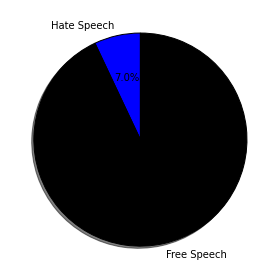

In [16]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['blue', 'black'])

plt.tight_layout()
plt.show()

Data Analysis

Lower Case

In [17]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [18]:
import string

Remove URLs

In [19]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Remove Punctuation

In [20]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Remove Special Characters

In [21]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

In [22]:
import re

Removing @

In [23]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

Tokenizing

In [24]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
def tokenize(text):
    text = word_tokenize(text)
    return text

#

In [26]:
df['tweet'] = df['tweet'].apply(tokenize)

StopWords

In [27]:
from nltk.corpus import stopwords

In [28]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text



In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
df['tweet'] = df['tweet'].apply(remove_stop)

In [31]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Lemmatization

In [33]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['tweet'] = df['tweet'].apply(Lemmatize)

In [34]:
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Feature** **Extraction**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 2000)

In [36]:
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [37]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()

In [38]:
text.shape

(31962, 2000)

In [39]:
import re
from sklearn.utils import resample

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(df, "tweet")
train_clean = clean_text(df, "tweet")

train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

**WordCloud**


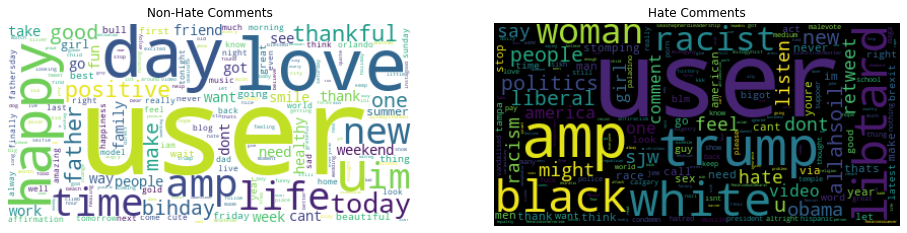

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][df.label == 0])
text_neg = " ".join(train_clean['tweet'][df.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

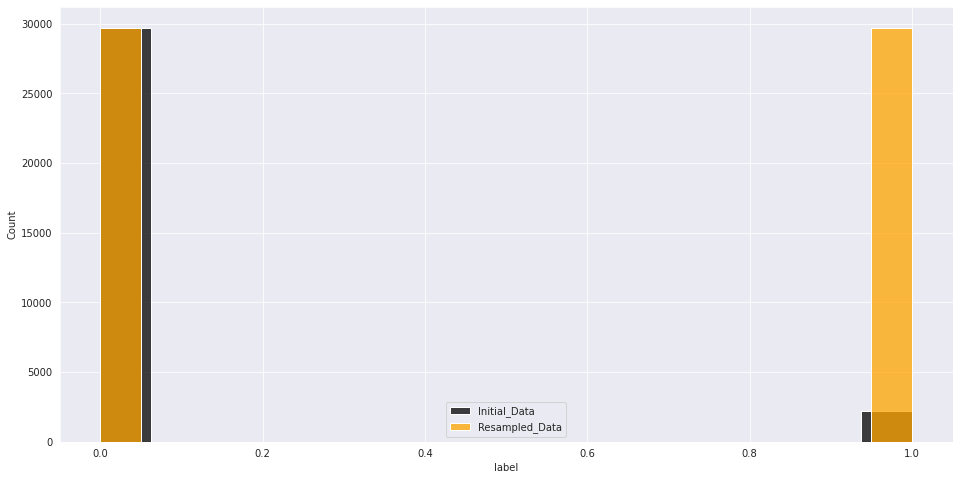

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = df['label'], color='black', legend=True)
sns.histplot(data = train_upsampled['label'], color = 'orange', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

WordCloud

--------------After Upsampling the Minority Class---------------


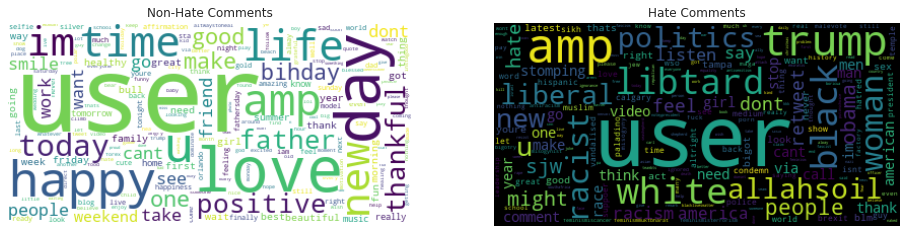

In [42]:
from wordcloud import WordCloud

print('--------------After Upsampling the Minority Class---------------')

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][df.label == 0])
text_neg = " ".join(train_upsampled['tweet'][df.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

Import Libraries


In [43]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
import xgboost as xgb

**Model-Creation & Training**

In [44]:
pipeline_xgb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', xgb.XGBClassifier(use_label =False)),])

**Split the Dataset**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

In [46]:
model = pipeline_xgb.fit(x_train, y_train)

In [49]:
y_predict = model.predict(x_test)
print('--'* 20)
print('F1_Score: ',f1_score(y_test, y_predict))
print('Accuracy_Score: ', accuracy_score(y_test, y_predict))
print('--'*20)
print('---RepeatedKFOLD---')
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state =1)
score2 = cross_val_score(pipeline_xgb, x_train, y_train, cv=cv, scoring='f1_micro', n_jobs=1)
score2 = np.mean(score2)
print('--'* 20)
print('RKFold_Score: ', score2)
print('--'* 20)

----------------------------------------
F1_Score:  0.7738393764825483
Accuracy_Score:  0.7754374158815612
----------------------------------------
---RepeatedKFOLD---
----------------------------------------
RKFold_Score:  0.7721063257065949
----------------------------------------


In [51]:
def predict(inp):
    inp = pd.Series(inp)
    yhat = ((np.ravel(model.predict(inp)).tolist()))
    if yhat[-1] == 1:
        print('Conc : Hate_Comment_Detected_😔')
    if yhat[-1] == 0:
        print('Conc: Not_a_hate_comment_😄')
    

inp = [' I hate humans and dogs !! they suck ', 'I love playing soccer ']
for i in inp:
    print('Entered_Comment: ', i)
    predict(i)
    print('--'*30)

Entered_Comment:   I hate humans and dogs !! they suck 
Conc: Not_a_hate_comment_😄
------------------------------------------------------------
Entered_Comment:  I love playing soccer 
Conc: Not_a_hate_comment_😄
------------------------------------------------------------


--- Axis1 = ref_val, Axis0 = pred_val ---
Confusion_Matrix: 
[[5709 1676]
 [1661 5814]]
Precsion_Score:  0.7730534867975626
Recall_Score:  0.7746268656716417
y_hat_shape:  (14860, 2)

random_classifier: ROC AUC=0.500
XGBclassifier: ROC AUC=0.876


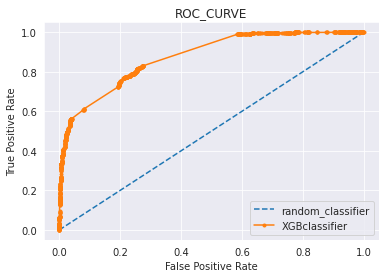

auc-score:  0.8841293079700966
f1-score:  0.7738393764825483


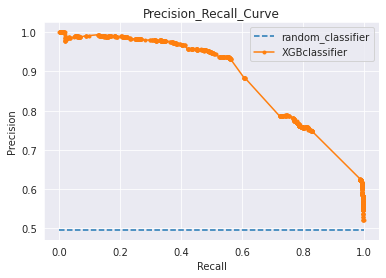

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('--- Axis1 = ref_val, Axis0 = pred_val ---')

x_val, y_val = x_test, y_test

yhat = model.predict_proba(x_val)
ypred = model.predict(x_val)
print('Confusion_Matrix: ')
print(confusion_matrix(y_val, ypred, labels = [1,0]).T)
print('Precsion_Score: ', precision_score(y_val, ypred, labels = [1,0]))
print('Recall_Score: ', recall_score(y_val, ypred, labels = [1,0]))

print('y_hat_shape: ',yhat.shape)
yhat = yhat[:,1]

ns_probs = [0 for _ in range(len(y_val))]
ns_auc = roc_auc_score(y_val, ns_probs, labels = [1,0])
lr_auc = roc_auc_score(y_val, yhat, labels = [1,0])
print()
print('random_classifier: ROC AUC=%.3f' % (ns_auc))
print('XGBclassifier: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, yhat)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='random_classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBclassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC_CURVE')
plt.show()

lr_precision, lr_recall, _ = precision_recall_curve(y_val, yhat)
print('auc-score: ',auc(lr_recall, lr_precision))
print('f1-score: ', f1_score(y_val, ypred, labels = [1,0]))
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='random_classifier')
plt.plot(lr_recall, lr_precision, marker='.', label='XGBclassifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision_Recall_Curve')
plt.show()

**Make a New Prediction**

In [56]:
import pickle 

In [57]:
TF_IDF= open("cv.pkl","wb")          
pickle.dump(vectorizer,TF_IDF)                                  
TF_IDF.close() 

In [58]:
pipeline = open("model.pkl","wb")          
pickle.dump(model,pipeline)                                  
pipeline.close() 

In [59]:
cv = open("cv.pkl","rb")           
cv = pickle.load(cv)                                 
cv

TfidfVectorizer(max_features=2000)

In [60]:
model = open("model.pkl","rb")           
model = pickle.load(model)  

In [63]:
comment = ["I support racism. I don't care"]
vect = cv.transform(comment).toarray()
model.predict(comment)

if model.predict(comment) == 1:
    print("Hate Speech")
else:
    print("Free Speech")

Hate Speech


In [65]:
comment = [" I respect the all kind of nationalities"]
vect = cv.transform(comment).toarray()
model.predict(comment)

if model.predict(comment) == 1:
    print("Hate Speech")
else:
    print("Free Speech")

Free Speech
